In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [7]:

tickers = 'NVDA'
data = yf.download(tickers, start="2020-01-01", end="2025-01-30")
data.tail()
start_date = '2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [8]:
data['Gain/Loss'] = np.where(data['Close'] > data['Close'].shift(1), 'Gain', 'Loss')
data

Price,Close,High,Low,Open,Volume,Gain/Loss
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2020-01-02,5.972712,5.972712,5.893295,5.943833,237536000,Loss
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000,Loss
2020-01-06,5.901758,5.906986,5.757612,5.783753,262636000,Gain
2020-01-07,5.973208,6.019016,5.885078,5.930139,314856000,Gain
2020-01-08,5.984411,6.025738,5.928894,5.968976,277108000,Gain
...,...,...,...,...,...,...
2025-01-23,147.220001,147.229996,143.720001,145.050003,155915500,Gain
2025-01-24,142.619995,148.970001,141.880005,148.369995,234657600,Loss


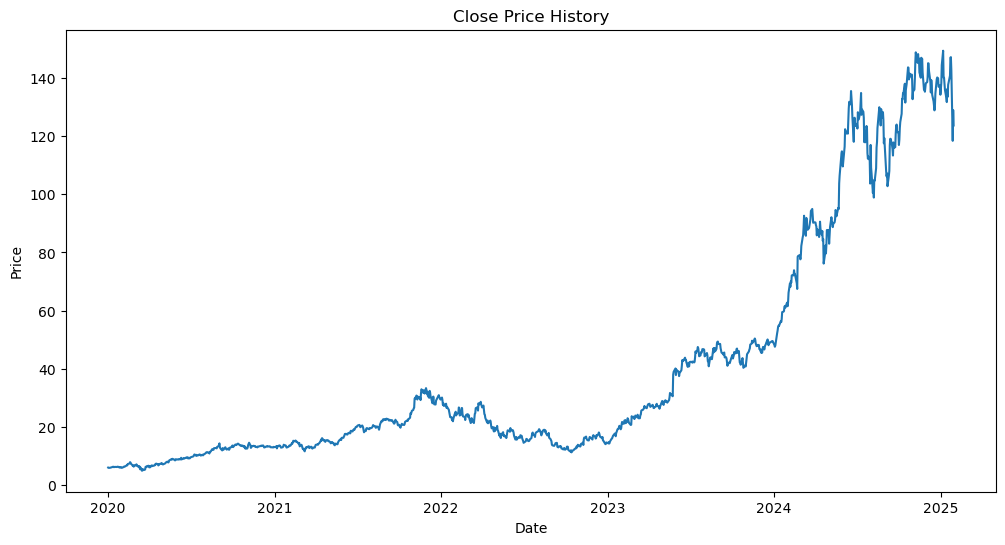

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1276.000000,1276.000000,1276.000000,1276.000000,1.276000e+03
mean,39.839132,40.584049,39.031414,39.853897,4.445523e+08
std,39.721938,40.480411,38.936054,39.806701,1.883689e+08
min,4.892426,5.229713,4.500832,4.984594,9.788400e+07
25%,13.606188,13.875260,13.355801,13.711380,3.033396e+08
50%,21.700228,22.085736,21.105906,21.588795,4.181150e+08
75%,46.553779,47.073851,45.334108,46.467157,5.453080e+08
max,149.429993,153.130005,147.820007,153.029999,1.543911e+09


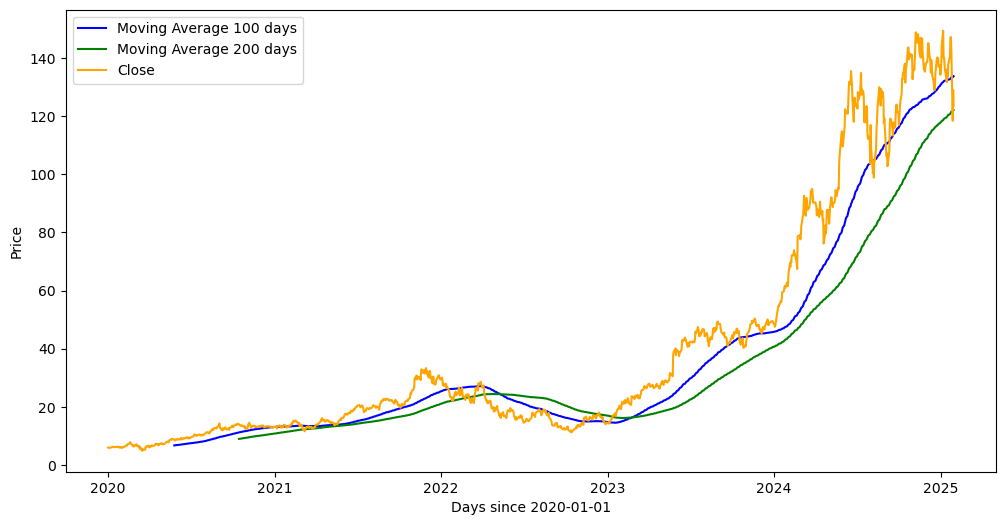

In [9]:
#Plotting the data and the moving averages
avg1 = data['Close'].rolling(100).mean()
avg2 = data['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(avg1, 'blue', label='Moving Average 100 days')
plt.plot(avg2, 'green', label='Moving Average 200 days')
plt.plot(data['Close'], 'orange', label='Close')
plt.legend(loc='upper left')
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Price')
plt.show()